Loading the data 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!unzip -u "/content/drive/MyDrive/UG Final Year Project/Plant_disease_dataset.zip" -d "/content/drive/MyDrive/UG Final Year Project"

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data_dir = "/content/drive/MyDrive/UG Final Year Project/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [5]:
# printing the disease names
print(diseases)

['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

In [6]:
import pickle
dl='/content/drive/MyDrive/UG Final Year Project/disease_classes.pkl'
pickle.dump(diseases, open(dl,'wb'))

In [7]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [8]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [9]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)']


In [10]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [11]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [12]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Grape___Black_rot,1888
Grape___Esca_(Black_Measles),1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1722
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Peach___Bacterial_spot,1838
Peach___healthy,1728
"Pepper,_bell___Bacterial_spot",1913
"Pepper,_bell___healthy",1988
Potato___Early_blight,1939


#### Visualizing the above information on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

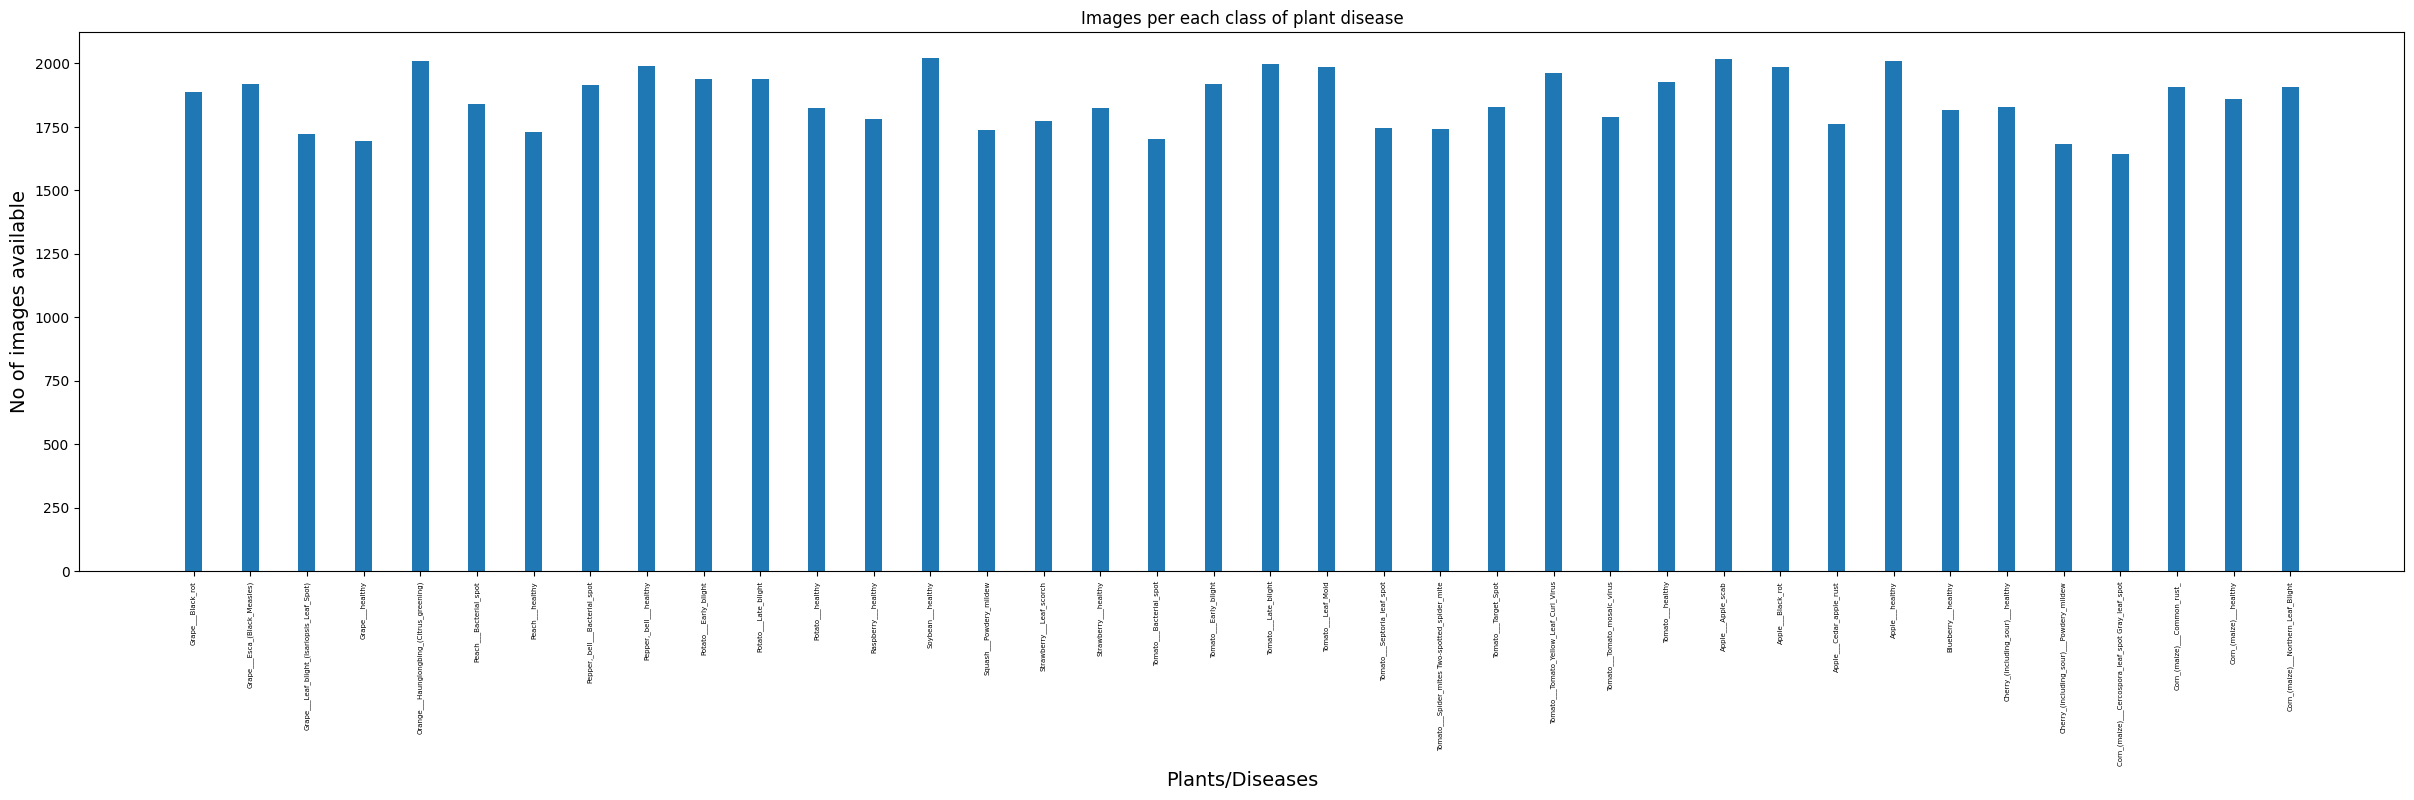

In [13]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(30, 7))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=14)
plt.ylabel('No of images available', fontsize=14)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

We can see that the dataset is almost balanced for all classes, so we are good to go forward

#### Images available for training

In [14]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70545 images for training


In [24]:
train_ds_dir = '/content/drive/MyDrive/UG Final Year Project/New Plant Diseases Dataset(Augmented)/train'
val_ds_dir = '/content/drive/MyDrive/UG Final Year Project/New Plant Diseases Dataset(Augmented)/valid'

In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_ds_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=64)

Found 70545 files belonging to 38 classes.
Using 56436 files for training.


In [26]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_ds_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=64)

Found 17572 files belonging to 38 classes.
Using 3514 files for validation.


#  Data Preparation for training and model training

In [20]:
import tensorflow_hub as hub
import tensorflow as tf

In [16]:
resnet = 'https://tfhub.dev/google/imagenet/resnet_v1_50/classification/5'

In [19]:
feature_extractor = hub.KerasLayer(
    resnet,
    input_shape= (256,256,3),
    trainable=False
)

In [22]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(38)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25612201  
                                                                 
 dense_1 (Dense)             (None, 38)                38076     
                                                                 
Total params: 25,650,277
Trainable params: 38,076
Non-trainable params: 25,612,201
_________________________________________________________________


In [23]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [ ]:
model.fit(train_ds, validation_data = val_ds, epochs = 20)

Epoch 1/20
518/882 [================>.............] - ETA: 2:09:49 - loss: 334.6799 - acc: 0.1535

In [ ]:
model.predict(val_ds)